# **UNIT 1 PROJECT**

# Homework 2: Project Part 2

## **Group 7**

### *Names*: Afeni Laws, Evie Davalbhakta, Rommy Sierra, Nathan Jackson, and Marybeth Yonk

#### Introduction

In this code, we outline the general activity of a neuron using the *Leaky Integrate and Fire Model*. We annotate each line of code within the code itself (indicated by the # comments within the code), explaining what it means in the scope of the model. We also include the output of the code and explain what the output means in the scope of the model. Overall, the code is used to generate a simulation of how a leaky integrative firing neuron uses current input, responds via a change in membrane potential, elicits a graded potential, and returns to a resting state before firing again. In this example specifically, a constant current input over a long period results in regular, excitable spikes of the neuron.

*Note*: This code has been updated to reflect the original goals of Homework 2 (no action potentials/spikings, only graded potential)

**References**

*Below are some references and/or images that we used as reference in creating our LIF model*

Dutta, S., Kumar, V., Shukla, A. et al. Leaky Integrate and Fire Neuron by Charge-Discharge Dynamics in Floating-Body MOSFET. 
    Sci Rep 7, 8257 (2017). https://doi.org/10.1038/s41598-017-07418-y

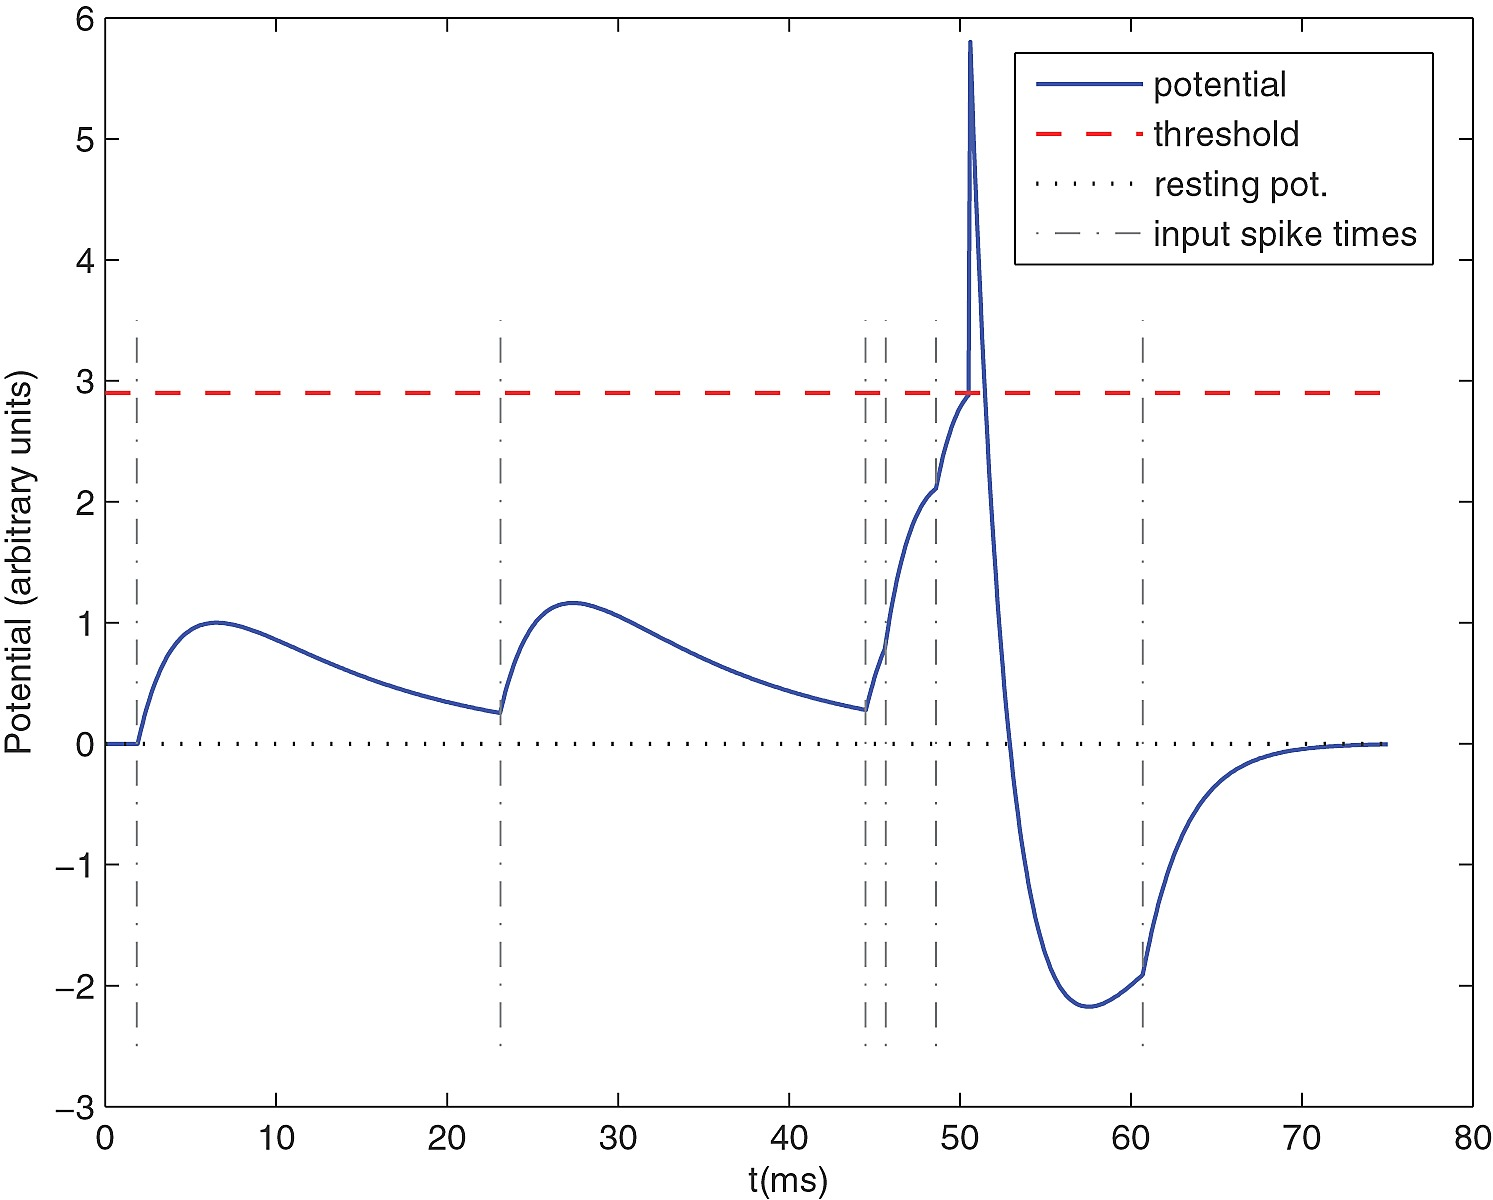

Masquelier, Timothée; Guyonneau, Rudy; J. Thorpe, Simon (2015). Leaky Integrate-and-Fire (LIF) neuron.. PLOS ONE. Figure. https://doi.org/10.1371/journal.pone.0001377.g003

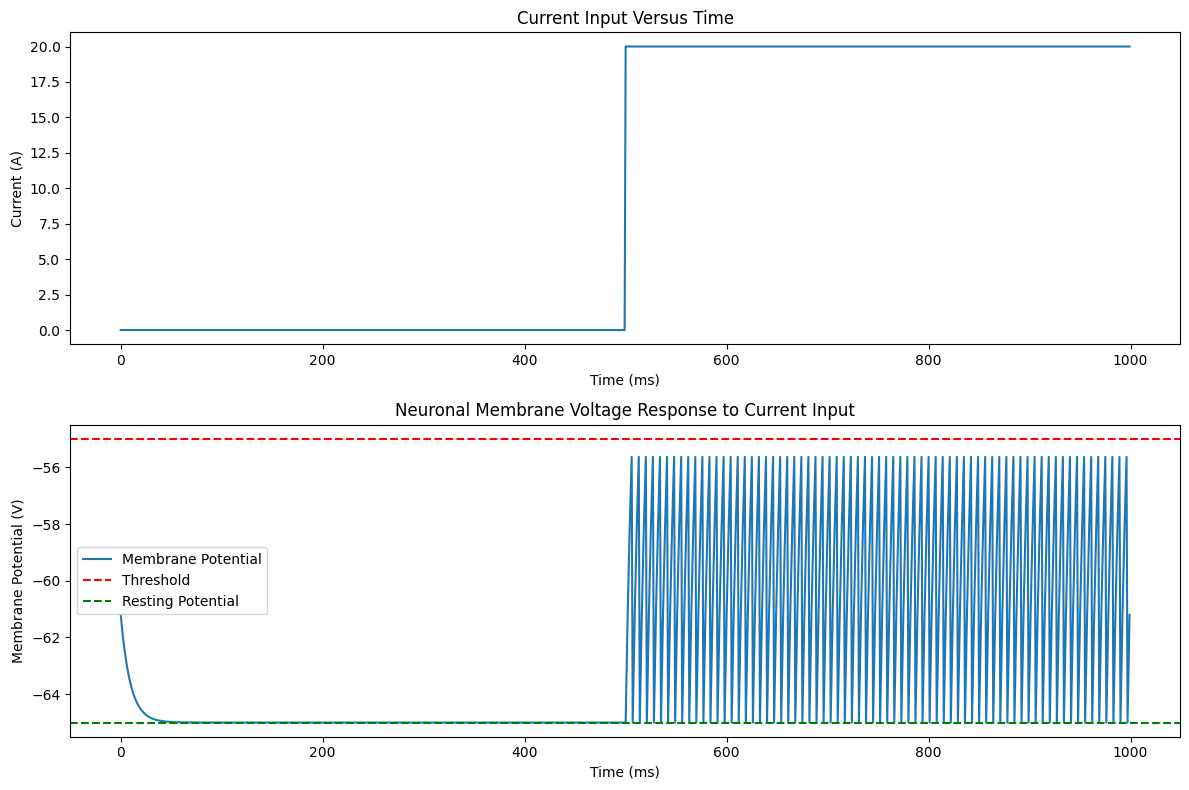

In [47]:
#This section of code is where the libraries "numpy" and "matplotlib" are imported in order for the code to have the proper resources to set up numerical operations and plot the spike data
import numpy as np
import matplotlib.pyplot as plt

#This section of the code is used to create a function that can be used to describe a LIF simulation
def lif_neuron(I, R=1, C=1, V_rest=-65, V_thresh=-55, V_reset=-65, dt=0.1, timesteps=1000):

    #This section of code is where all of the parameters are defined conceptually
    """
    Simulate a Leaky Integrate and Fire (LIF) neuron.

    Parameters:
    - I: Input current (constant or array)
    - R: Membrane resistance
    - C: Membrane capacitance
    - V_rest: Resting membrane potential
    - V_thresh: Threshold potential for firing
    - V_reset: Reset potential after firing
    - dt: Time step for numerical integration
    - timesteps: Number of simulation time steps

    Returns:
    - V: Membrane potential over time
    - spikes: Spike times
    """

    #This area of the code is necessary to set the initial variables of membrane potential and the times the spikes occur
    V = np.zeros(timesteps)
    spikes = []

    #This is a loop that goes through each point in time to determine the behavior of the neuron
    for t in range(-2, timesteps):
        #This is function that calculates the change in membrane potential according to the leaky integrate and fire model
        dV = (I[t - 1] - (V[t - 1] - V_rest) / R) / C * dt
        #This function is continuously updates the membrane potential at each point in time on the graph
        V[t] = V[t - 1] + dV

        #This is an "if" statement that sees if the calculated membrane voltage at the assessed time step is equivalent to the threshold. If it is, a spike is induced. If not, there is no spike.
        if V[t] >= V_thresh:
            V[t] = V_reset
            spikes.append(t)

    #This is where the spike times and the membrane potential for each point in time are returned
    return V, spikes

# This code is creating the input current and the change of current at 500 ms and says that the input current for the first 500 time steps is 0 and then 20A for the rest
I_step = np.concatenate([np.zeros(500), np.ones(500) * 20])

# This is calling the original LIF model function defined initially in the scope of the current input defined above
V_step, spikes_step = lif_neuron(I_step)

# All of the code below is relevant to plotting the data above
plt.figure(figsize=(12, 8))

#This is plot 1 relating to the input current plot
plt.subplot(2, 1, 1)
plt.plot(I_step, label='Input Current')
plt.title('Current Input Versus Time')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')

#This is plot 2 relating to the actual spike simulation of the neuron. Lines for threshold and resting potential were added to show how the input current affects the firing of the neuron through change in membrane voltage
plt.subplot(2, 1, 2)
plt.plot(V_step, label='Membrane Potential')
plt.axhline(y=-55, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-65, color='g', linestyle='--', label='Resting Potential')
plt.title('Neuronal Membrane Voltage Response to Current Input')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (V)')

#This is for the legend
plt.legend()
plt.tight_layout()
plt.show()

4. It appears that our LIF model doesn’t have a refractory period or any brief resting periods between the following action potential; the neuron spikes, becomes hyperpolarized, and returns to the resting potential state very quickly. This is most unlike a real biological neuron because without periodic pauses or refractory periods between action potentials it doesn’t allow the neuron a state or recovery between firing and therefore, it never fully returns to its resting potential. I would say this LIF model is missing periodic inhibitions and/or refractory period(s) and the quick state or resting potential followed by an immediate spike is what makes it dissimilar to a real neuron.

5. The most challenging part of this homework was editing the code that ChatGPT gave us to result in a more specific and desired graphical output. Overall, ChatGPT's code did work, but it was placing spikes in incorrect places and had incorrect labels on the axes. There was a good amount of debugging to be done in the code to give the best output.

6. This homework probably took us, collectively, 6 hours with all of the debugging and analysis of the code.

# Homework 3: Project Part 3

1. Voltage-gated sodium channels are very important for depolarization and the restoration of the resting membrane potential. Biologically, the voltage-gated sodium channels are opened when a stimulus creates a graded potential that reaches a threshold and triggers an action potential. During the initial spike, the opening of the voltage-gated sodium channels causes an influx of sodium into the neuron and the membrane voltage becomes much more positive. At the peak of the spike, the voltage-gated sodium channels close the voltage-gated potassium channels open to depolarize/hyperpolarize the membrane voltage. They are important to include in the model of the neuron because they will provide a more realistic visualization of the behavior of actual biological neurons described previously. It will allow for refractory periods, threshold behavior, and all-or-nothing responses to be evident in the visualization. This is unlike homework 2, where the neuron only elicited a graded potential and no action potentials were reached. 

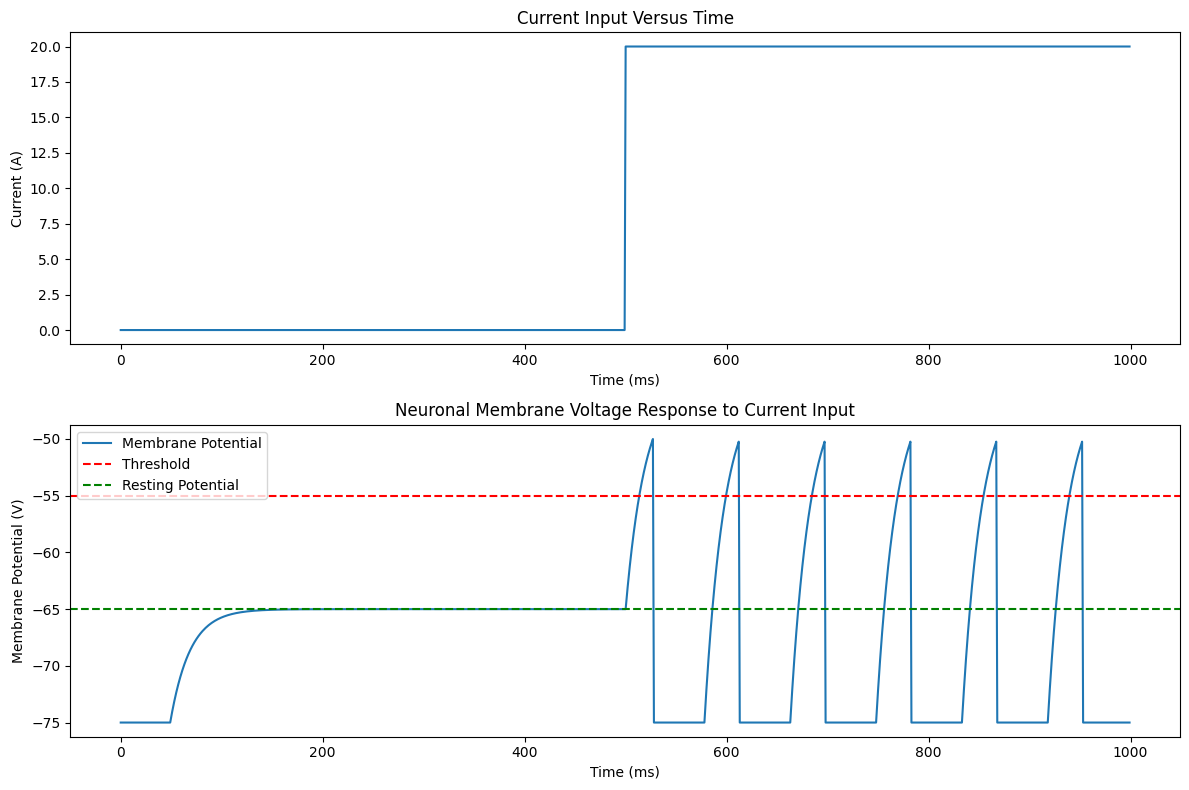

In [45]:
#This section of code is where the libraries "numpy" and "matplotlib" are imported in order for the code to have the proper resources to set up numerical operations and plot the spike data
import numpy as np
import matplotlib.pyplot as plt

#This section of the code is used to create a function that can be used to describe a LIF simulation
def lif_neuron_with_refractory(I, R=1, C=1, V_rest=-70, V_thresh=-55, V_reset=-80, refractory_period=50, dt=0.05, timesteps=1000, g_Na=1, E_Na=50, m_inf=-0.036, tau_m=1):
    V = np.zeros(timesteps)
    spikes = []
    m = np.zeros(timesteps)
    refractory_countdown = 0

    #This section of code is where all of the parameters are defined conceptually
    """
    Simulate a Leaky Integrate and Fire (LIF) neuron.

    Parameters:
    - I: Input current (constant or array)
    - R: Membrane resistance
    - C: Membrane capacitance
    - V_rest: Resting membrane potential
    - V_thresh: Threshold potential for firing
    - V_reset: Reset potential after firing
    - dt: Time step for numerical integration
    - timesteps: Number of simulation time steps

    Returns:
    - V: Membrane potential over time
    - spikes: Spike times
    """

    #This area of the code is necessary to set the initial variables of membrane potential and the times the spikes occur
    for t in range(-1, timesteps):
        # This is to check and affirm if the neuron is in the refractory period or not
        if refractory_countdown > 0:
            V[t] = V_reset
            refractory_countdown -= 1
            continue

        # Update sodium channel activation using a simple first-order kinetics (variable m represents sodium channel activation)
        dm = (m_inf - m[t - 1]) / tau_m * dt
        m[t] = m[t - 1] + dm

        # Calculating sodium current based on Hodgkin-Huxley model equations
        I_Na = g_Na * m[t]**3 * (V[t - 1] - E_Na)

        # Revise the membrane potential using LIF dynamics equations (from previous code)
        dV = (I[t - 1] - I_Na - (V[t - 1] - V_rest) / R) / C * dt
        V[t] = V[t - 1] + dV

        # This is an "if" statement that sees if the calculated membrane voltage at the assessed time step is equivalent to the threshold. If it is, a spike is induced. If not, there is no spike.
        if V[t] >= V_thresh:
            V[t] = V_reset
            spikes.append(t)
            refractory_countdown = refractory_period

    # This is where the spike times and the membrane potential for each point in time are returned
    return V+5, spikes

# This code is creating the input current and the change of current at 500 ms and says that the input current for the first 500 time steps is 0 and then 20A for the rest
I_step = np.concatenate([np.zeros(500), np.ones(500) * 20])

# This is calling the original LIF model function defined initially in the scope of the current input defined above
V_step, spikes_step = lif_neuron_with_refractory(I_step)

# All of the code below is relevant to plotting the data above
plt.figure(figsize=(12, 8))

# This is plot 1 relating to the input current plot
plt.subplot(2, 1, 1)
plt.plot(I_step, label='Input Current')
plt.title('Current Input Versus Time')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')

# This is plot 2 relating to the actual spike simulation of the neuron. Lines for threshold and resting potential were added to show how the input current affects the firing of the neuron through change in membrane voltage
plt.subplot(2, 1, 2)
plt.plot(V_step, label='Membrane Potential')
plt.axhline(y=-55, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-65, color='g', linestyle='--', label='Resting Potential')
plt.title('Neuronal Membrane Voltage Response to Current Input')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (V)')

# This is for the legend
plt.legend()
plt.tight_layout()
plt.show()


3. The main changes that were made to the code were to account for voltage sodium channels opening and closing at various times in the action potential process, eliciting a spike above threshold, as well as adding a refractory period. The refractory period was accounted for by defining a function that redefined the LIF neuron with a refractory period (lif_neuron_with_refractory) which specified the refractory period that occurs after each spike. The proceeding loops in the function check to see if the membrane potential is in the refractory period based on the injected current. If the neuron is not in the refractory period, the sodium channel activation variable (m) is updated with a first-order kinetics equation. First-order kinetics is used because the variable is dependent on one variable concentration. If the neuron is in a refractory period, the membrane potential is reset to resting potential (we could not figure out how to make the repolarization period a smoother curve). The current for sodium was then calculated using the Hodgkin-Huxley equations and the activation variable. Hodgkin-Huxley equations form a pre-determined model of conductance based on how action potential in neurons is initiated/propagated. The current value for sodium was then used to update the membrane potential of the entire neuron using a variation of the LIF function defined in the part 2 homework. The rest of the code has remained the same because it has to do with the plotting and the LIF we have previously established.

    *Note*: We updated the code to be more cohesive with the voltage potentials in a biological neuron membrane

4. Git-hub was pretty straightforward to work collaboratively on. We would mainly use Google Docs to share code and answers to questions and to work collaboratively simultaneously. One group member could compile all of the content into JupyterLabs and then share the file with the other group members for approval. We found this method to be most efficient. If any errors occurred, it was due to human communication errors, but not the software itself.


5. I predict that the coding in order to model a simple feedforward neural network trained using gradient descent and backpropagation will be a lot more complicated. Gradient descent iteratively adjusts the parameters to be more optimal. In turn, finding the weights with the least bias. Backpropagation uses calculus and the chain rule to calculate the gradient of loss which is a key component of gradient descent. This model requires more computation and has more optimization than the LIF model. More functions, equations, and variables will be needed to integrate the feedforward system in this way. Overall, this model will be able to solve more tasks, even that of prediction.  